In [34]:
# import necessary libraries
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
from numpy import datetime64
import seaborn as sns
import pprint

pp = pprint.PrettyPrinter(indent=4)


#### Scenario 1 - Money lending of fixed interest rate for unsecured purchase

In [35]:
# import data from csv files
# credit card rate
df_cc_rate = pd.read_csv('credit_card_rate.csv', parse_dates=['Date'], names=['Date', 'cc_rate'], skiprows=1)
# FICO score
df_fico = pd.read_csv('FICO_score.csv', parse_dates=['Date'], names=['Date', 'FICO'], skiprows=1)
# interest rate
df_interest = pd.read_csv('interest_rate.csv', parse_dates=['Date'], names=['Date', 'interest_rate'], skiprows=1)
# CPI
df_cpi = pd.read_csv('CPI.csv', parse_dates=['Date'], names=['Date', 'cpi'], skiprows=1)
# unemployment rate
df_unemployment = pd.read_csv('unemployment_rate.csv', parse_dates=['Date'], names=['Date', 'unemployment'], skiprows=1)

In [36]:
# data cleaning and outer merge datasets
df_cc_rate = df_cc_rate[df_cc_rate['cc_rate']!='.']
df_fico = df_fico[df_fico['FICO']!='.']
df_interest = df_interest[df_interest['interest_rate']!='.']
df_cpi = df_cpi[df_cpi['cpi']!='.']
df_unemployment = df_unemployment[df_unemployment['unemployment']!='.']
df_merge = df_cc_rate.merge(df_fico, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_interest, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_cpi, left_on=['Date'], right_on=['Date'], how='outer')
df_merge = df_merge.merge(df_unemployment, left_on=['Date'], right_on=['Date'], how='outer')
df_merge.set_index('Date', inplace=True)
df_merge.sort_index(inplace=True)
for col in df_merge.columns:
    df_merge[col] = df_merge[col].astype(float)
df_merge

cc_rate   FICO  interest_rate    cpi  unemployment
Date                                                          
1947-01-01      NaN    NaN            NaN  21.48           NaN
1947-02-01      NaN    NaN            NaN  21.62           NaN
1947-03-01      NaN    NaN            NaN  22.00           NaN
1947-04-01      NaN    NaN            NaN  22.00           NaN
1947-05-01      NaN    NaN            NaN  21.95           NaN
...             ...    ...            ...    ...           ...
2023-06-22      NaN  6.623           5.07    NaN           NaN
2023-06-23      NaN  6.581           5.07    NaN           NaN
2023-06-24      NaN    NaN           5.07    NaN           NaN
2023-06-25      NaN    NaN           5.07    NaN           NaN
2023-06-26      NaN  6.584           5.07    NaN           NaN

[25288 rows x 5 columns]

Text(0.5, 1.0, 'Plot interest_rate and FICO')

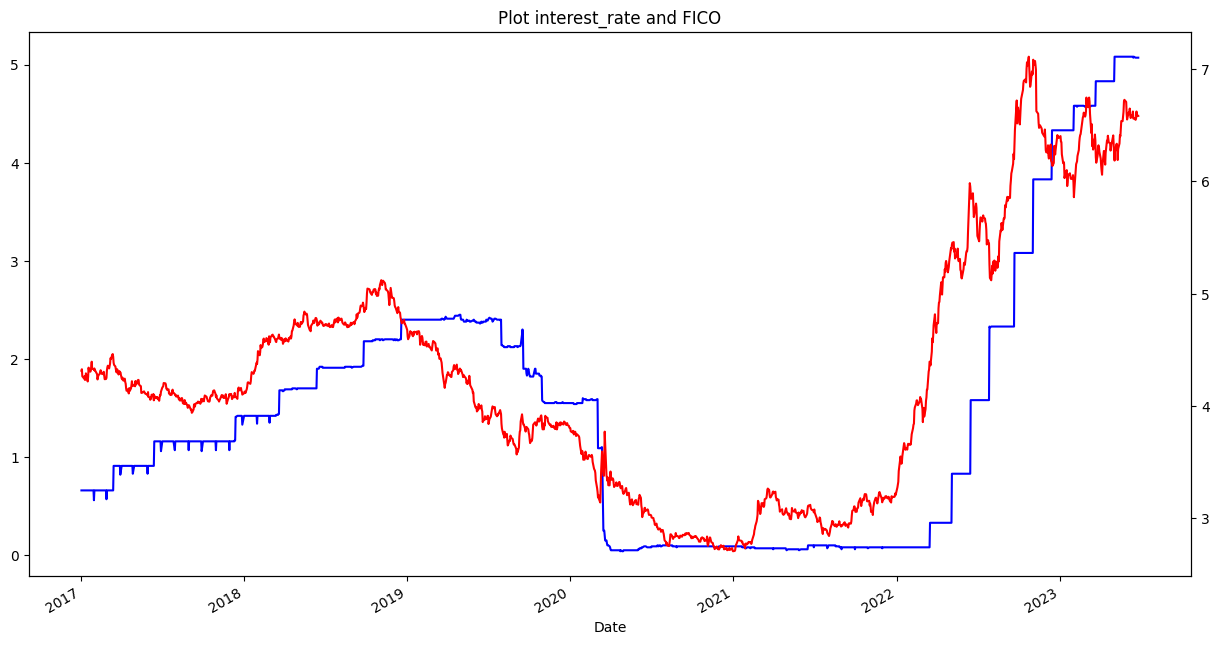

In [37]:
# plot two time series
varList = ['interest_rate', 'cpi', 'unemployment']
proxyList = ['FICO', 'cc_rate']

fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[0],proxyList[0]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Text(0.5, 1.0, 'Plot interest_rate and cc_rate')

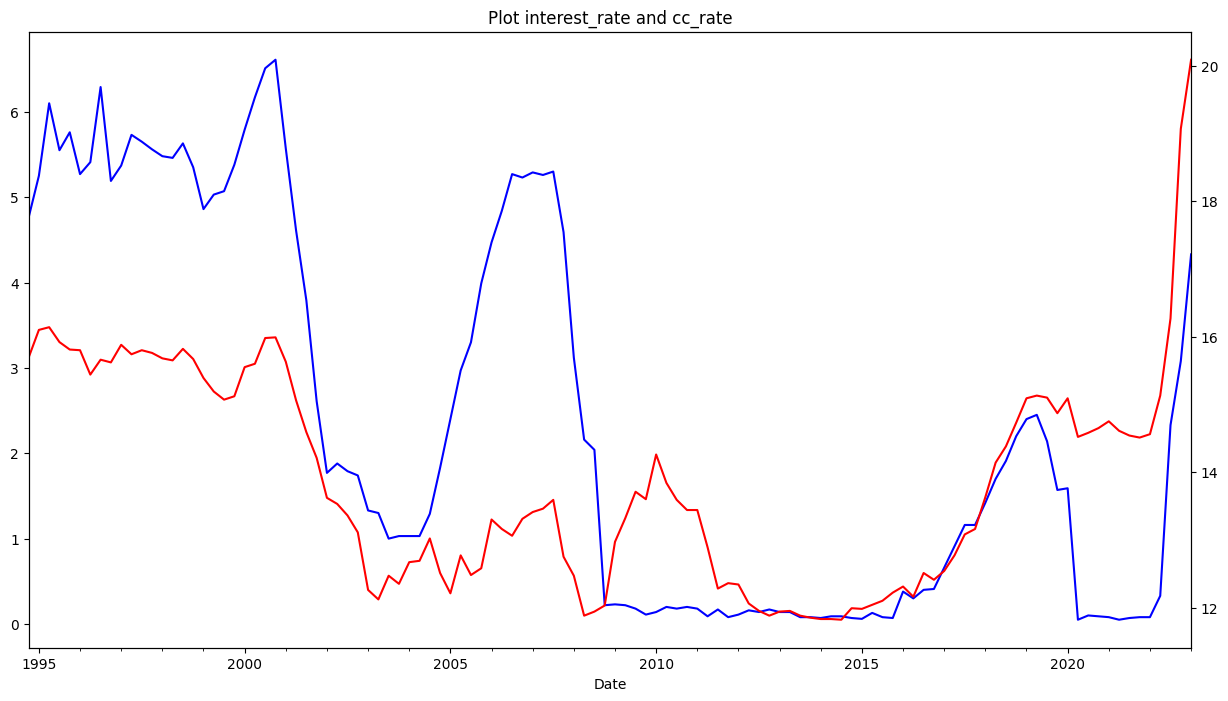

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[0],proxyList[1]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Text(0.5, 1.0, 'Plot cpi and FICO')

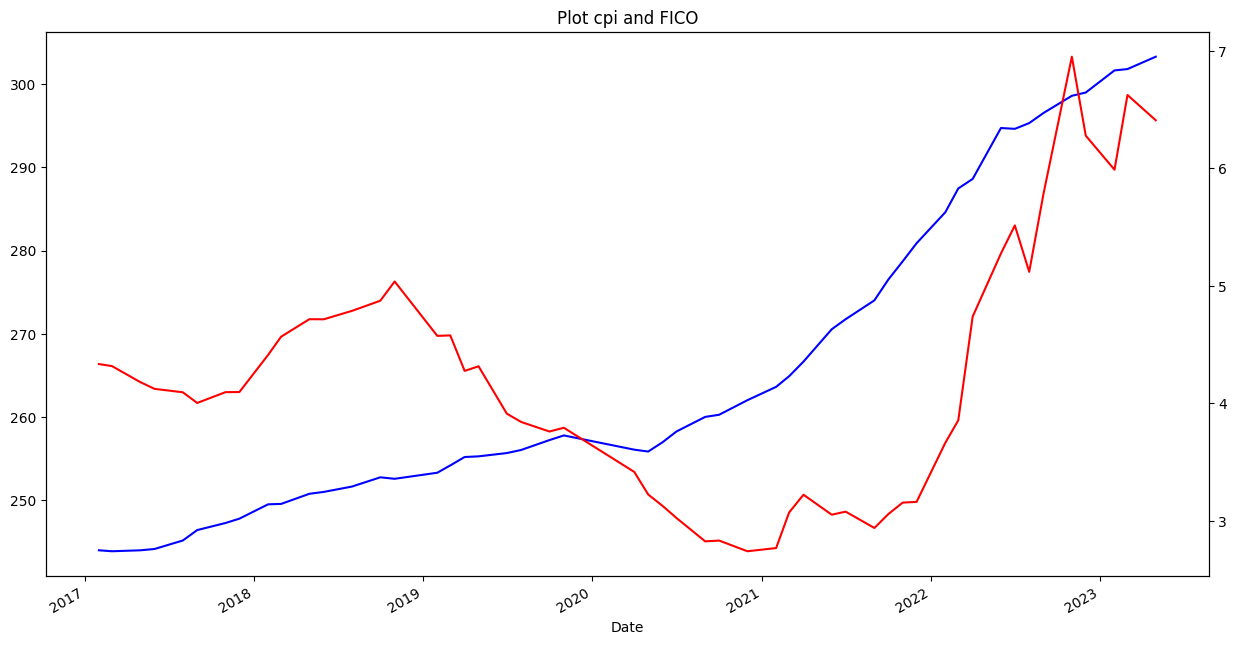

In [39]:
fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[1],proxyList[0]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Text(0.5, 1.0, 'Plot cpi and cc_rate')

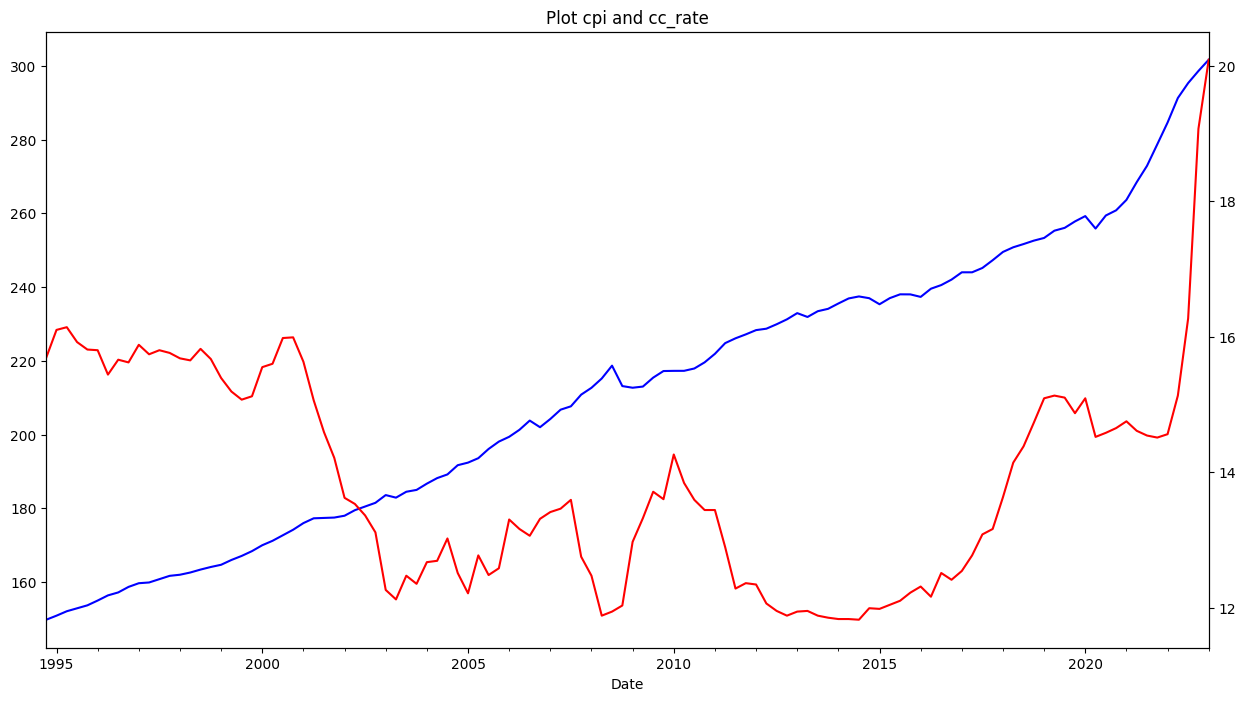

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[1],proxyList[1]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Text(0.5, 1.0, 'Plot unemployment and FICO')

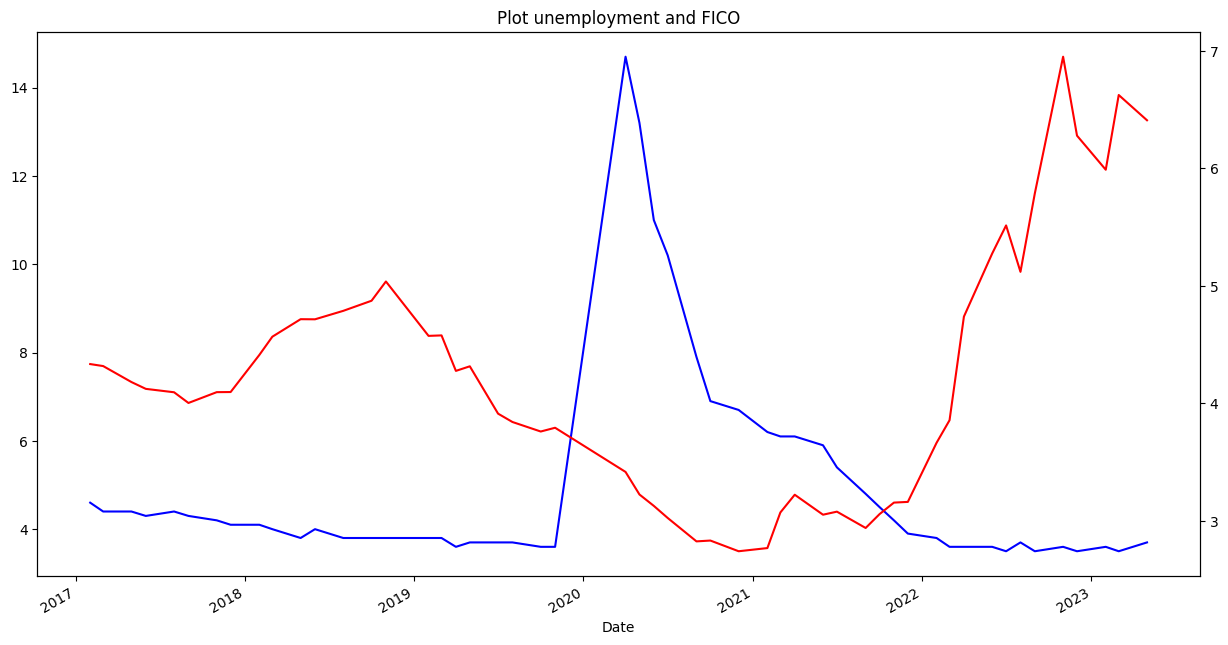

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[2],proxyList[0]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Text(0.5, 1.0, 'Plot unemployment and cc_rate')

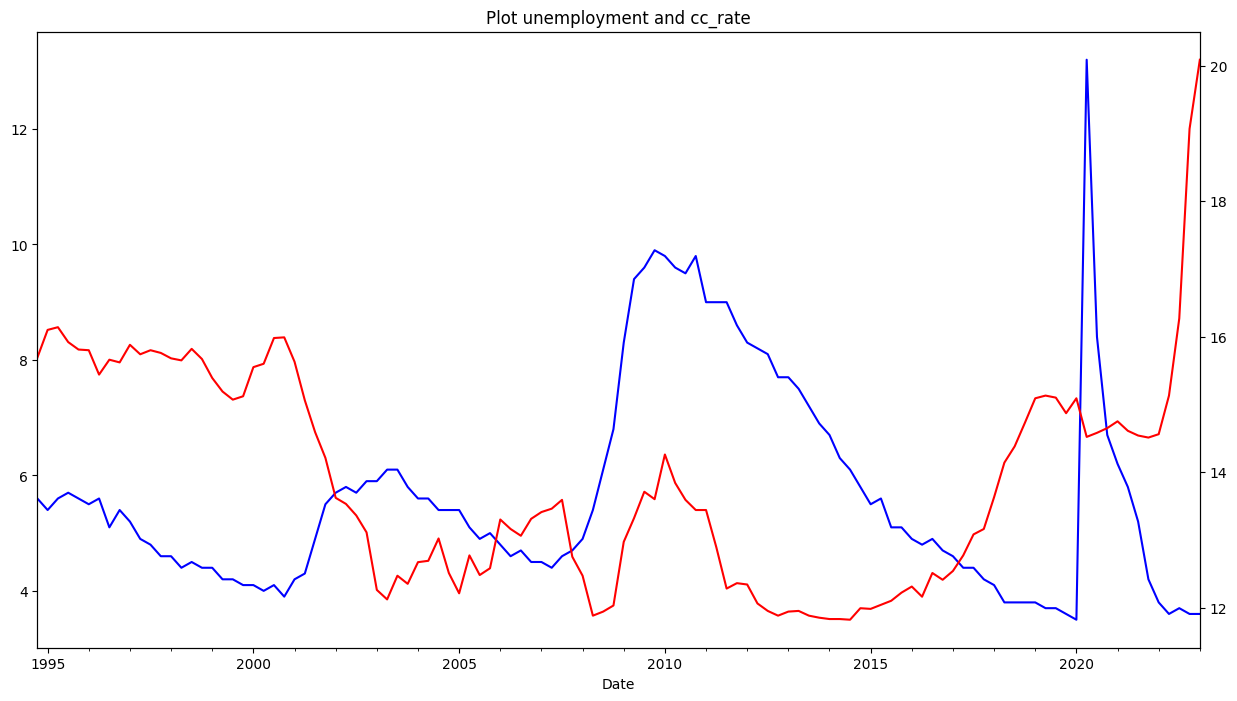

In [42]:
fig, ax = plt.subplots(figsize=(15,8))
proxy,var = varList[2],proxyList[1]
df_plot = df_merge[[proxy, var]]
df_plot = df_plot.dropna()
df_plot[proxy].plot(ax=ax, color='Blue')
df_plot[var].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot %s and %s' % (proxy, var))

Graph 1: The blue line is the percentage level of FICO score 740 or higher while the red line is interest rate level. A negative relationship holds between the two time series with some time latency as shown from the graph. <br/>
Graph 4: The blue line is the credit card rate while the red line is the FED interest rate level. Similar trend holds for the both time series since the 1990s. <br/>
Graph 2/5: The blue line is the FICO score/ credit card rate while the red line is CPI level. The constantly increasing trend of CPI level has little relationship with the credit score or credit rate level.
Graph 6: The blue line is the credit card rate while the red line is the unemployment rate. An inverse relationship holds between the two time series.

*italicised text*#### Scenario 4 - Security lending of publicly traded stock

In [43]:
# import data from csv files
# JPM 5Y cds
df_cds = pd.read_csv('JPM5Y_CDS.csv', parse_dates=['Date'], names=['Date', 'Price', 'Open', 'High', 'Low', '%change'], skiprows=1)
df_cds = df_cds[['Date', 'Price', '%change']]
df_cds = df_cds.rename(columns={'Price':'px_cds', '%change':'pct_cds'})
# JPM share price
df_share = pd.read_csv('JPM.csv', parse_dates=['Date'], names=['Date', 'Price', 'Open', 'High', 'Low', 'Vol', '%change'], skiprows=1)
df_share = df_share[['Date', 'Price', '%change']]
df_share = df_share.rename(columns={'Price':'px', '%change':'pct'})
df_merge = df_cds.merge(df_share, left_on=['Date'], right_on=['Date'], how='inner')
df_merge.set_index(['Date'], inplace=True)
df_merge.sort_index(inplace=True)
df_merge

px_cds pct_cds      px     pct
Date                                      
2017-01-03   63.36  -0.02%   87.23   1.09%
2017-01-04   63.37   0.02%   86.91  -0.37%
2017-01-05   63.37   0.00%   86.11  -0.92%
2017-01-06   63.37   0.00%   86.12   0.01%
2017-01-09   63.86   0.77%   86.18   0.07%
...            ...     ...     ...     ...
2023-06-22   62.70  -0.03%  139.58  -1.93%
2023-06-23   63.12   0.67%  138.85  -0.52%
2023-06-26   64.23   1.76%  139.19   0.24%
2023-06-27   65.20   1.51%  139.20   0.01%
2023-06-28   63.62  -2.42%  138.59  -0.44%

[1630 rows x 4 columns]

Text(0.5, 1.0, 'Plot JPM share price and 5Y CDS price')

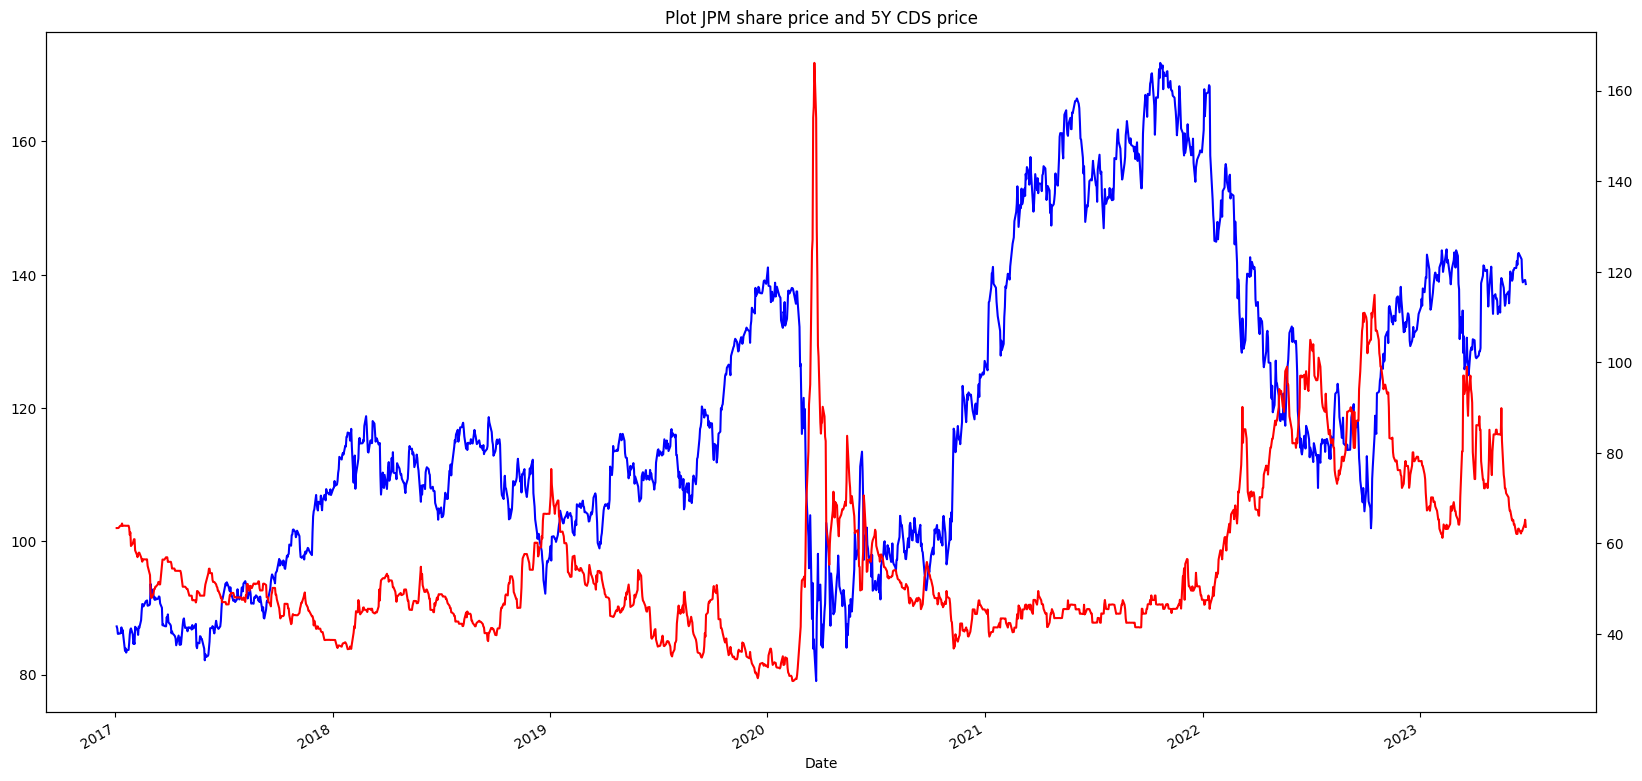

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
df_merge['px'].plot(ax=ax, color='Blue')
df_merge['px_cds'].plot(ax=ax, secondary_y=True, color='Red')
ax.set_title('Plot JPM share price and 5Y CDS price')

The blue line is the share price of JPM while the red line is the price of JPM 5-year credit default swap. An inverse relationship can be observed between the two time series.

## Scenario 2 and 5 - "Home Mortgage: Money at a floating rate for secured purchase for an individual" and "10-year US Treasury Bonds : Publicly traded bonds "

In [45]:
# data of 10 year treasury bond and mortgage rates of last 10 years
end_date = datetime.date(2023,3,31)
start_date = datetime.date(2013,4,1)
# data source - FRED
dataSource = "fred"
# ticket for 10 year treasury bond and mortgage rate
Treasury_10year_BondYeild = 'DGS10'
mortgage_yeild = "MORTGAGE30US"
# reading data with DataReader from pandas
bond_df = pdr.DataReader(Treasury_10year_BondYeild,data_source=dataSource,start=start_date,end=end_date)
mortgage_df = pdr.DataReader(mortgage_yeild,data_source=dataSource,start=start_date,end=end_date)

In [46]:
# Data infomations
bond_df.info()
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2013-04-01 to 2023-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   2503 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2013-04-04 to 2023-03-30
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MORTGAGE30US  522 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [47]:
# Reading data from csv files
# inflation rate of USA
# Treasury bond yield
# GDP growth rate of USA

## And cleaning the data for our use
inflation_df = pd.read_csv("/content/united-states-inflation-rate-cpi.csv")
inflation_df["timestamp"] =pd.to_datetime(inflation_df['date'], format='%Y-%m-%d')
inflation_df = inflation_df.set_index("timestamp")
inflation_df.drop(columns=["date"," Annual Change "],inplace=True)
treasurybond_yield_df = pd.read_csv("/content/10-year-treasury-bond-rate-yield-chart.csv")
treasurybond_yield_df["timestamp"] =pd.to_datetime(treasurybond_yield_df['date'], format='%Y-%m-%d')
treasurybond_yield_df = treasurybond_yield_df.set_index("timestamp")

gdp_df = pd.read_csv("/content/united-states-gdp-growth-rate.csv")
gdp_df["timestamp"] =pd.to_datetime(gdp_df['date'], format='%Y-%m-%d')
gdp_df = gdp_df.set_index("timestamp")
gdp_df.drop(columns=["date"," Annual Change "],inplace=True)


Using **GDP Growth rate of USA** and **Inflation rate of USA**.
Using both of them to see how they are correlated to Mortgage rate and 10-year Treasury bond yield.

In [48]:
# gdp_df.info()
# inflation_df.info()
# df = pd.concat([gdp_df,inflation_df])
# df.info()
# df
#treasurybond_yield_df.info( )
corr_matrix = {
"inflaction_bond_corr" : inflation_df[' Inflation Rate (%)'].corr(treasurybond_yield_df[" value"]),
"gdp_bond_corr" : gdp_df[" GDP Growth (%)"].corr(treasurybond_yield_df[" value"]),
"inflaction_mortgage_df" : inflation_df[' Inflation Rate (%)'].corr(mortgage_df["MORTGAGE30US"]),
"gdp_mortgage_df" : gdp_df[' GDP Growth (%)'].corr(mortgage_df["MORTGAGE30US"]),
"mortgage_bond_df" : mortgage_df["MORTGAGE30US"].corr(treasurybond_yield_df[" value"])
}
pp.pprint(corr_matrix)

{   'gdp_bond_corr': 0.031366356722038344,
    'gdp_mortgage_df': 0.9996507016799715,
    'inflaction_bond_corr': 0.7305220338254347,
    'inflaction_mortgage_df': -0.35899209486940326,
    'mortgage_bond_df': 0.9094106312247959}
